In [65]:
import pandas as pd
# From http://pandas.pydata.org/pandas-docs/version/0.23/visualization.html
# http://pandas.pydata.org/pandas-docs/version/0.23/visualization.html#scatter-matrix-plot
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import numpy as np


hd5_filename="ftp_performance.results.h5"
store = pd.HDFStore(hd5_filename)
print(store.info())
print(dir(store))
store.df_mi
df=store.df_mi
cs=store.df_cs
df.rename(columns={0:'bandwidth'}, inplace="true")
cs.bandwidth=cs.bandwidth.astype(float)
print(df.columns)
print(cs.columns)


<class 'pandas.io.pytables.HDFStore'>
File path: ftp_performance.results.h5
/df_cs            frame        (shape->[1,5])  
/df_mi            frame        (shape->[180,1])
['__bytes__', '__class__', '__contains__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__fspath__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__unicode__', '__weakref__', '_check_if_open', '_complevel', '_complib', '_create_storer', '_filters', '_fletcher32', '_handle', '_mode', '_path', '_read_group', '_validate_format', '_write_to_group', 'append', 'append_to_multiple', 'close', 'copy', 'create_table_index', 'filename', 'flush', 'get', 'get_node', 'get_storer', 'groups', 'info', 'i

In [16]:
print(df.info())
print(40*'6')
print(df.index)
# print(dir(df))
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 180 entries, (1024, 1e-09, 0.0, IPv4) to (4096, 100.0, 100.0, IPv6)
Data columns (total 1 columns):
bandwidth    180 non-null float64
dtypes: float64(1)
memory usage: 2.4+ KB
None
6666666666666666666666666666666666666666
MultiIndex(levels=[[1024, 2048, 4096], [1e-09, 10.0, 20.0, 50.0, 75.0, 100.0], [0.0, 10.0, 20.0, 50.0, 100.0], ['IPv4', 'IPv6']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1

In [66]:
print(cs.info())
print(40*'@')
print(cs.index)
# print(dir(df))
print(cs.columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 5 columns):
SIZE         180 non-null object
LOSS         180 non-null object
DELAY        180 non-null object
PROTOCOL     180 non-null object
bandwidth    180 non-null float64
dtypes: float64(1), object(4)
memory usage: 8.4+ KB
None
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            170, 171, 172, 173, 174, 175, 176, 177, 178, 179],
           dtype='int64', length=180)
Index(['SIZE', 'LOSS', 'DELAY', 'PROTOCOL', 'bandwidth'], dtype='object')


In [56]:
ipv4_bool_vec=cs['PROTOCOL'] == "IPv4"
ipv6_bool_vec=np.invert(ipv4_bool_vec)
loss_0_bool_vec=cs['LOSS'] == "1e-09"
delay_0_bool_vec=cs['DELAY'] == "0.0"
size_4096_bool_vec=cs['SIZE']=='4096'

In [51]:
cs[loss_0_bool_vec & ipv6_bool_vec & delay_0_bool_vec ]

,SIZE,LOSS,DELAY,PROTOCOL,bandwidth
1,1024,1e-09,0.0,IPv6,11100000.0
61,2048,1e-09,0.0,IPv6,11100000.0
121,4096,1e-09,0.0,IPv6,11100000.0


In [58]:
cs[delay_0_bool_vec & size_4096_bool_vec ]

,SIZE,LOSS,DELAY,PROTOCOL,bandwidth
120,4096,1e-09,0.0,IPv4,10900000.0
121,4096,1e-09,0.0,IPv6,11100000.0
130,4096,10.0,0.0,IPv4,11200000.0
131,4096,10.0,0.0,IPv6,11100000.0
140,4096,20.0,0.0,IPv4,11200000.0
141,4096,20.0,0.0,IPv6,11100000.0
150,4096,50.0,0.0,IPv4,362000.0
151,4096,50.0,0.0,IPv6,11100000.0
160,4096,75.0,0.0,IPv4,119000.0
161,4096,75.0,0.0,IPv6,11100000.0


In [95]:
bv_1_4=ipv4_bool_vec & ( cs.DELAY=="0.0" ) & size_4096_bool_vec
bv_1_6=ipv6_bool_vec & ( cs.DELAY=="0.0" ) & size_4096_bool_vec
print(cs[bv_1_4],"\n",cs[bv_1_6])

     SIZE   LOSS DELAY PROTOCOL   bandwidth
120  4096  1e-09   0.0     IPv4  10900000.0
130  4096   10.0   0.0     IPv4  11200000.0
140  4096   20.0   0.0     IPv4  11200000.0
150  4096   50.0   0.0     IPv4    362000.0
160  4096   75.0   0.0     IPv4    119000.0
170  4096  100.0   0.0     IPv4         0.0 
      SIZE   LOSS DELAY PROTOCOL   bandwidth
121  4096  1e-09   0.0     IPv6  11100000.0
131  4096   10.0   0.0     IPv6  11100000.0
141  4096   20.0   0.0     IPv6  11100000.0
151  4096   50.0   0.0     IPv6  11100000.0
161  4096   75.0   0.0     IPv6  11100000.0
171  4096  100.0   0.0     IPv6  11100000.0


Text(0,0.5,'Bandwidth Bytes/sec')

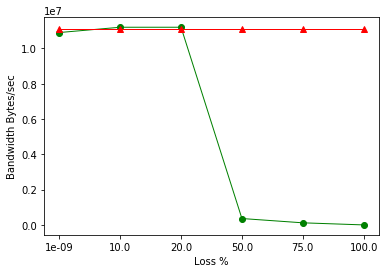

In [85]:
plt.plot(cs.LOSS[bv_1_4],cs.bandwidth[bv_1_4], 'go-', cs.LOSS[bv_1_6],
        cs.bandwidth[bv_1_6], 'r^-', linewidth=1.0)
# plt.plot(cs.LOSS[(cs['PROTOCOL']=='IPv6')],cs.bandwidth[(cs['PROTOCOL']=='IPv6')])
plt.xlabel("Loss %")
plt.ylabel("Bandwidth Bytes/sec")

In [90]:
bv_1_4=ipv4_bool_vec & ( cs.DELAY=="10.0" ) & size_4096_bool_vec
bv_1_6=ipv6_bool_vec & ( cs.DELAY=="10.0" ) & size_4096_bool_vec
print(cs[bv_1_4],"\n",cs[bv_1_6])

     SIZE   LOSS DELAY PROTOCOL   bandwidth
122  4096  1e-09  10.0     IPv4  10500000.0
132  4096   10.0  10.0     IPv4  10500000.0
142  4096   20.0  10.0     IPv4  10500000.0
152  4096   50.0  10.0     IPv4   8750000.0
162  4096   75.0  10.0     IPv4         0.0
172  4096  100.0  10.0     IPv4         0.0      SIZE   LOSS DELAY PROTOCOL   bandwidth
123  4096  1e-09  10.0     IPv6  11100000.0
133  4096   10.0  10.0     IPv6  11100000.0
143  4096   20.0  10.0     IPv6  11100000.0
153  4096   50.0  10.0     IPv6  11100000.0
163  4096   75.0  10.0     IPv6  11100000.0
173  4096  100.0  10.0     IPv6  11100000.0


Text(0,0.5,'Bandwidth Bytes/sec')

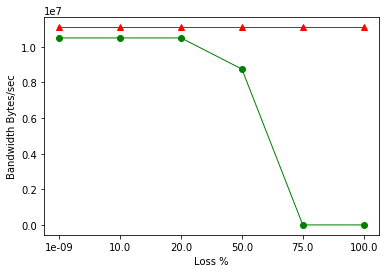

In [91]:
plt.plot(cs.LOSS[bv_1_4],cs.bandwidth[bv_1_4], 'go-', cs.LOSS[bv_1_6],
        cs.bandwidth[bv_1_6], 'r^-', linewidth=1.0)
# plt.plot(cs.LOSS[(cs['PROTOCOL']=='IPv6')],cs.bandwidth[(cs['PROTOCOL']=='IPv6')])
plt.xlabel("Loss %")
plt.ylabel("Bandwidth Bytes/sec")


     SIZE   LOSS DELAY PROTOCOL  bandwidth
124  4096  1e-09  20.0     IPv4  7180000.0
134  4096   10.0  20.0     IPv4  7080000.0
144  4096   20.0  20.0     IPv4  7140000.0
154  4096   50.0  20.0     IPv4  3070000.0
164  4096   75.0  20.0     IPv4    18500.0
174  4096  100.0  20.0     IPv4        0.0      SIZE   LOSS DELAY PROTOCOL   bandwidth
125  4096  1e-09  20.0     IPv6  11100000.0
135  4096   10.0  20.0     IPv6  11100000.0
145  4096   20.0  20.0     IPv6  11100000.0
155  4096   50.0  20.0     IPv6  11100000.0
165  4096   75.0  20.0     IPv6  11100000.0
175  4096  100.0  20.0     IPv6  11100000.0


Text(0,0.5,'Bandwidth Bytes/sec')

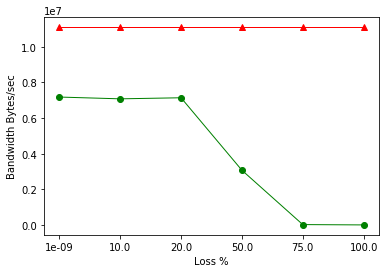

In [93]:
bv_1_4=ipv4_bool_vec & ( cs.DELAY=="20.0" ) & size_4096_bool_vec
bv_1_6=ipv6_bool_vec & ( cs.DELAY=="20.0" ) & size_4096_bool_vec
print(cs[bv_1_4],"\n",cs[bv_1_6])
plt.plot(cs.LOSS[bv_1_4],cs.bandwidth[bv_1_4], 'go-', cs.LOSS[bv_1_6],
        cs.bandwidth[bv_1_6], 'r^-', linewidth=1.0)
# plt.plot(cs.LOSS[(cs['PROTOCOL']=='IPv6')],cs.bandwidth[(cs['PROTOCOL']=='IPv6')])
plt.xlabel("Loss %")
plt.ylabel("Bandwidth Bytes/sec")

0      1024
1      1024
2      1024
3      1024
4      1024
5      1024
6      1024
7      1024
8      1024
9      1024
10     1024
11     1024
12     1024
13     1024
14     1024
15     1024
16     1024
17     1024
18     1024
19     1024
20     1024
21     1024
22     1024
23     1024
24     1024
25     1024
26     1024
27     1024
28     1024
29     1024
       ... 
150    4096
151    4096
152    4096
153    4096
154    4096
155    4096
156    4096
157    4096
158    4096
159    4096
160    4096
161    4096
162    4096
163    4096
164    4096
165    4096
166    4096
167    4096
168    4096
169    4096
170    4096
171    4096
172    4096
173    4096
174    4096
175    4096
176    4096
177    4096
178    4096
179    4096
Name: SIZE, Length: 180, dtype: object


In [ ]:
import matplotlib.pyplot as plt
plt.plot(cs.LOSS[(cs['PROTOCOL']=='IPv4')],cs.bandwidth[(cs['PROTOCOL']=='IPv4')])
# plt.plot(cs.LOSS[(cs['PROTOCOL']=='IPv6')],cs.bandwidth[(cs['PROTOCOL']=='IPv6')])
plt.xlabel("Loss %")
plt.ylabel("Bandwidth Bytes/sec")

In [ ]:
plt.plot(cs.DELAY,cs.bandwidth)
plt.xlabel("Delay, msec")
plt.ylabel("Bandwidth Bytes/sec")

In [ ]:
plt.plot(cs.PROTOCOL,cs.bandwidth)
plt.xlabel("PROTOCOL")
plt.ylabel("Bandwidth Bytes/sec")

In [ ]:
plt.plot(cs.SIZE, cs.bandwidth)
plt.xlabel("SIZE")
plt.ylabel("Bandwidth Bytes/sec")

In [ ]:
cs.PROTOCOL
